## 1. Importing all the important libraries


In [3]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from glob import glob
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPooling2D

In [4]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive

drive.mount('/content/gdrive')
##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Mounted at /content/gdrive


In [5]:
# Defining the path for train and test images
train_path="gdrive/My Drive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
test_path="gdrive/My Drive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test/"
data_dir_train = pathlib.Path(train_path)
data_dir_test = pathlib.Path(test_path)

Mounted at /content/gdrive
This dataset has about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [6]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
128


## 2. Data Preparation


In [7]:
#Use 80% of the images for training, and 20% for validation.


batch_size = 32
img_height = 180
img_width = 180

### 2.1 Train Data Set Creation


In [8]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train, labels='inferred', label_mode='categorical',
    class_names=None, color_mode='rgb', batch_size=32, image_size=(180,
    180), shuffle=True, seed=123, validation_split=0.2, subset='training',
    interpolation='bilinear', follow_links=False, smart_resize=False
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


### 2.2 Validation Data Set Creation

In [9]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train, labels='inferred', label_mode='categorical',
    class_names=None, color_mode='rgb', batch_size=32, image_size=(180,
    180), shuffle=True, seed=123, validation_split=0.2, subset='validation',
    interpolation='bilinear', follow_links=False, smart_resize=False
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [10]:
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### 3. Visualizing the data

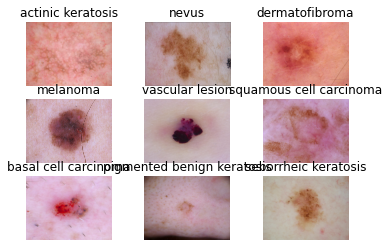

In [11]:
import matplotlib.pyplot as plt
num=0
for dirpath, dirnames, filenames in os.walk(str(train_path)):
    for filename in [f for f in filenames if f.endswith(".jpg")][:1]:
        img = PIL.Image.open(str(dirpath)+"/"+str(filename))
        plt.subplot(3,3,num+1)
        plt.title(str(dirpath).split('/')[-1])
        plt.axis('off')
        plt.imshow(img)
        num=num+1

In [12]:
#Dataset.cache() keeps the images in memory after they're loaded off disk during the first epoch.

#Dataset.prefetch() overlaps data preprocessing and model execution while training.

AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

## 4. Model 0<br>
### 4.1 Creating the model


In [13]:
model=Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(scale=1./255., offset=0.0,),         
    
    Conv2D(32,(3,3),input_shape=(img_height,img_width,3),activation='relu',padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.1),
    
    Conv2D(64,(3,3),activation='relu',padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.1),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.25),   
    Dense(9, activation='softmax')
])

### 4.2 Compiling the model

In [14]:
# Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 607s 2s/step - loss: 3.1606 - accuracy: 0.2087 - val_loss: 2.0641 - val_accuracy: 0.3356
Epoch 2/20
56/56 [==============================] - 3s 55ms/step - loss: 1.9395 - accuracy: 0.2824 - val_loss: 1.8355 - val_accuracy: 0.3960
Epoch 3/20
56/56 [==============================] - 3s 60ms/step - loss: 1.7579 - accuracy: 0.3890 - val_loss: 1.6919 - val_accuracy: 0.4787
Epoch 4/20
56/56 [==============================] - 3s 55ms/step - loss: 1.5845 - accuracy: 0.4509 - val_loss: 1.5258 - val_accuracy: 0.4989
Epoch 5/20
56/56 [==============================] - 3s 55ms/step - loss: 1.5128 - accuracy: 0.4844 - val_loss: 1.4712 - val_accuracy: 0.5101
Epoch 6/20
56/56 [==============================] - 3s 54ms/step - loss: 1.4379 - accuracy: 0.4866 - val_loss: 1.5206 - val_accuracy: 0.4966
Epoch 7/20
56/56 [==============================] - 3s 55ms/step - loss: 1.3776 - accuracy: 0.5128 - val_loss: 1.4598 - val_accuracy: 0.4966
Epoch 8/20
56

In [16]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 90, 90, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 64)       0         
 2D)                                                    

### 4.4 Visualizing training results


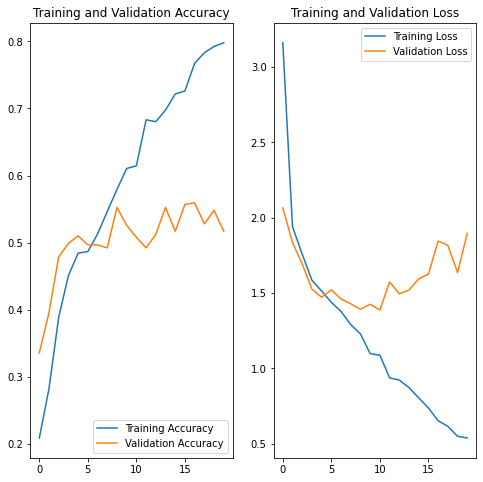

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### 4.5 Observations<br>
The accuracy of the model for the Training data set is at 78%. But the Validation accuracy is not in par with the training accuracy.<br>
It is only at 53%. The validation loss as observed is very high.
This could also be indicative of some Overfit in the model.<br>
We could add some Dropout layers and remove the BatchNormalization layers.
And by adding a few more layers, we could improve the accuracy by trying to extract more features.


## 5. Model 1<br>
### 5.1 Creating the Model


In [18]:
model_update=Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(scale=1./255., offset=0.0,),         
                             
    Conv2D(32,(3,3),input_shape=(img_height,img_width,3),activation='relu',padding='same'),
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.7),
    
    Conv2D(64,(3,3),activation='relu',padding='same'),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.7),
    
    Conv2D(128,(3,3),activation='relu',padding='same'),
    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.7),
    
    Flatten(),
    Dense(100, activation='relu'),
    Dropout(0.25),   
    Dense(9, activation='softmax')
])

### 5.2 Compiling the model

In [19]:
model_update.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics='accuracy')

### 5.3 Training the model

In [20]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model_update.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 11s 131ms/step - loss: 2.2151 - accuracy: 0.1858 - val_loss: 2.0553 - val_accuracy: 0.1924
Epoch 2/20
56/56 [==============================] - 6s 107ms/step - loss: 2.0413 - accuracy: 0.2026 - val_loss: 2.0318 - val_accuracy: 0.1924
Epoch 3/20
56/56 [==============================] - 6s 108ms/step - loss: 2.0321 - accuracy: 0.1942 - val_loss: 2.0226 - val_accuracy: 0.2058
Epoch 4/20
56/56 [==============================] - 6s 107ms/step - loss: 2.0238 - accuracy: 0.2098 - val_loss: 2.0331 - val_accuracy: 0.2058
Epoch 5/20
56/56 [==============================] - 6s 108ms/step - loss: 2.0313 - accuracy: 0.1864 - val_loss: 2.0245 - val_accuracy: 0.2058
Epoch 6/20
56/56 [==============================] - 6s 107ms/step - loss: 2.0222 - accuracy: 0.1959 - val_loss: 2.0215 - val_accuracy: 0.2058
Epoch 7/20
56/56 [==============================] - 6s 108ms/step - loss: 2.0240 - accuracy: 0.1920 - val_loss: 2.0173 - val_accuracy: 0.2058
Epoch

### 5.4 Visualizing the results

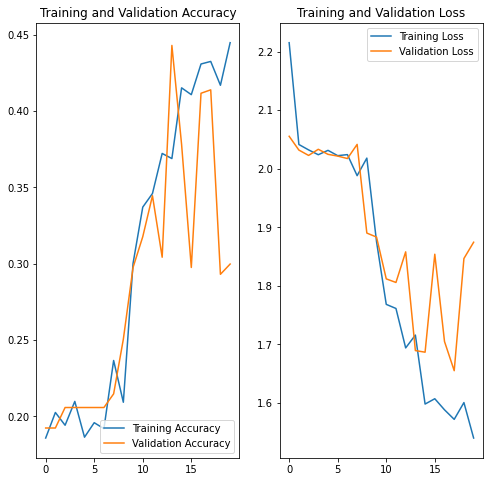

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### 5.5 Observations<br>
The model accuracy for Train data set has dropped to nearly 45%.<br>
The accuracy for the Validation set is at 40%.<br>
This is a much better model compared to the previous model as there seems to be No Overfit with the training accuracy 45% and validation accuracy at 40%.

## 6. Data Augmentation<br>
### 6.1 Specifying the Augmentation

In [22]:
data_augmentation=tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2)
])

### 6.2 Visualizing the Augmented Data


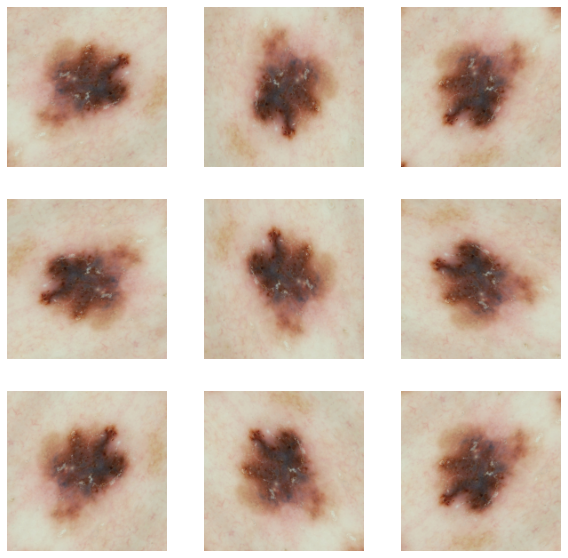

In [23]:
image, label = next(iter(train_ds))
image=np.array(image,np.int32)  
plt.figure(figsize=(10, 10))
for i in range(9):
  augmented_image = data_augmentation(image)
  ax = plt.subplot(3, 3, i + 1)
  augmented_image1=np.array(augmented_image[0],np.int32)  
  plt.imshow((augmented_image1))
  plt.axis("off")

## 7. Model 2

### 7.1 Creating the Model



In [24]:
model_augmented=Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(scale=1./255., offset=0.0,),         

    data_augmentation,

    Conv2D(32,(3,3),input_shape=(img_height,img_width,3),activation='relu',padding='same'),
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.7),
    
    Conv2D(64,(3,3),activation='relu',padding='same'),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.7),
    
    Conv2D(128,(3,3),activation='relu',padding='same'),
    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.7),
    
    Flatten(),
    Dense(100, activation='relu'),
    Dropout(0.25),   
    Dense(9, activation='softmax')
])

### 7.2 Compiling the model

In [25]:
model_augmented.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics='accuracy')

### 7.3 Training the model

In [26]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model_augmented.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


56/56 [==============================] - 15s 169ms/step - loss: 2.1466 - accuracy: 0.1886 - val_loss: 2.0472 - val_accuracy: 0.1924
Epoch 2/20
56/56 [==============================] - 10s 176ms/step - loss: 2.0387 - accuracy: 0.1892 - val_loss: 2.0206 - val_accuracy: 0.2058
Epoch 3/20
56/56 [==============================] - 10s 176ms/step - loss: 2.0300 - accuracy: 0.1948 - val_loss: 2.0293 - val_accuracy: 0.2058
Epoch 4/20
56/56 [==============================] - 9s 166ms/step - loss: 2.0318 - accuracy: 0.2009 - val_loss: 2.0227 - val_accuracy: 0.2058
Epoch 5/20
56/56 [==============================] - 10s 172ms/step - loss: 2.0292 - accuracy: 0.1836 - val_loss: 2.0284 - val_accuracy: 0.2058
Epoch 6/20
56/56 [==============================] - 10s 174ms/step - loss: 2.0249 - accuracy: 0.2070 - val_loss: 2.0370 - val_accuracy: 0.2058
Epoch 7/20
56/56 [==============================] - 10s 175ms/step - loss: 2.0247 - accuracy: 0.2070 - val_loss: 2.0238 - val_accuracy: 0.2058
Epoch 8/20


### 7.4 Visualizing the results


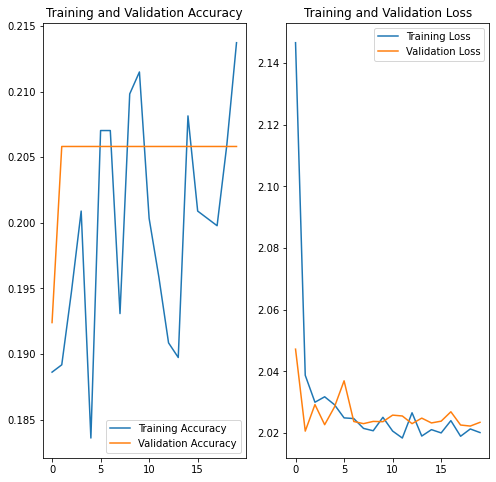

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### 7.5 Observations<br>
The model accuracy for Train data set has gone up to nearly 48%.<br> 
The accuracy for the Validation set is also at 48%.<br>
This is a much better model compared to the previous two models as there seems to be No Overfit with the training accuracy 48% and validation accuracy at 48%.<br>
Data Augmentation has improved the model performance.

## 8. Checking for Class Imbalance

In [28]:
for i in class_names:
    directory =train_path+i+'/'
    class_directory = pathlib.Path(directory)
    length=len(list(class_directory.glob('*.jpg')))
    print(f'{i} has {length} samples.')

actinic keratosis has 114 samples.
basal cell carcinoma has 376 samples.
dermatofibroma has 95 samples.
melanoma has 438 samples.
nevus has 357 samples.
pigmented benign keratosis has 462 samples.
seborrheic keratosis has 77 samples.
squamous cell carcinoma has 181 samples.
vascular lesion has 139 samples.


The samples of various classes are not in equal proportion.<br>
There is a significant Class Imbalance observed.<br>
The class with the least number of samples is Seborrheic Keratosis with 77.<br>
The class that dominates the data in terms of proportionate number of samples is Pigmented Benign Keratosis with sample size of 462.

## 9. Using Augmentor for Class Imbalance Treatment<br>
### 9.1 Installing Augmentor

In [29]:
!pip install Augmentor

#To use Augmentor, the following general procedure is followed:

#Instantiate a Pipeline object pointing to a directory containing your initial image data set.
#Define a number of operations to perform on this data set using your Pipeline object.
#Execute these operations by calling the Pipeline’s sample() method.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### 9.2 Using Augmentor

In [30]:
path_to_training_dataset=train_path
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500)
    ## We are adding 500 samples per class to make sure that none of the classes are sparse.
    #Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

Initialised with 114 image(s) found.
Output directory set to gdrive/My Drive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FD54BD524F0>: 100%|██████████| 500/500 [00:21<00:00, 23.37 Samples/s]


Initialised with 376 image(s) found.
Output directory set to gdrive/My Drive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FD54BF941C0>: 100%|██████████| 500/500 [00:26<00:00, 18.81 Samples/s]


Initialised with 95 image(s) found.
Output directory set to gdrive/My Drive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FD5582C7D90>: 100%|██████████| 500/500 [00:22<00:00, 21.77 Samples/s]


Initialised with 438 image(s) found.
Output directory set to gdrive/My Drive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=2048x1536 at 0x7FD5580518E0>: 100%|██████████| 500/500 [01:42<00:00,  4.88 Samples/s]


Initialised with 357 image(s) found.
Output directory set to gdrive/My Drive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FD558221880>: 100%|██████████| 500/500 [01:41<00:00,  4.92 Samples/s]


Initialised with 462 image(s) found.
Output directory set to gdrive/My Drive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FD5C4636490>: 100%|██████████| 500/500 [00:19<00:00, 25.40 Samples/s]


Initialised with 77 image(s) found.
Output directory set to gdrive/My Drive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FD54BED1C70>: 100%|██████████| 500/500 [00:45<00:00, 11.04 Samples/s]


Initialised with 181 image(s) found.
Output directory set to gdrive/My Drive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FD5B02C38E0>: 100%|██████████| 500/500 [00:20<00:00, 23.97 Samples/s]


Initialised with 139 image(s) found.
Output directory set to gdrive/My Drive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FD54BF94310>: 100%|██████████| 500/500 [00:19<00:00, 25.66 Samples/s]


In [31]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


In [32]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]


In [33]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]


In [34]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))


In [35]:
for i in class_names:
    directory =train_path+i+'/'
    directory_out =train_path+i+'/output/'
    class_directory = pathlib.Path(directory)
    class_directory_out = pathlib.Path(directory_out)
    length=len(list(class_directory.glob('*.jpg')))
    length_out=len(list(class_directory_out.glob('*.jpg')))
    length_tot=length+length_out
    print(f'{i} has {length_tot} samples.')

actinic keratosis has 614 samples.
basal cell carcinoma has 876 samples.
dermatofibroma has 595 samples.
melanoma has 938 samples.
nevus has 857 samples.
pigmented benign keratosis has 962 samples.
seborrheic keratosis has 577 samples.
squamous cell carcinoma has 681 samples.
vascular lesion has 639 samples.


## 9.3 Observations<br>
The Augmentor has helped decrease the imbalance in class images and that can be viewed from above.<br>
So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

## 10. Modelling Augmented Data

In [36]:
batch_size = 32
img_height = 180
img_width = 180

### 10.1 Creating the Train Data Set

In [37]:
data_dir_train=train_path
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123, label_mode='categorical',
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


### 10.2 Creating the Validation Data Set

In [38]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123, label_mode='categorical',
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


## 11. Model 3<br>
### 11.1 Creating the Model

In [39]:
model_final=Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(scale=1./255., offset=0.0,),         
    
    Conv2D(32,(3,3),input_shape=(img_height,img_width,3),activation='relu',padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.1),
    
    Conv2D(64,(3,3),activation='relu',padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.1),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.25),   
    Dense(9, activation='softmax')
])

### 11.2 Compiling the Model

In [40]:
model_final.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics='accuracy')

### 11.3 Training the Model


In [41]:
epochs = 30
## Your code goes here, use 50 epochs.
history = model_final.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
169/169 [==============================] - 48s 260ms/step - loss: 2.4321 - accuracy: 0.1775 - val_loss: 2.0012 - val_accuracy: 0.2309
Epoch 2/30
169/169 [==============================] - 38s 222ms/step - loss: 1.8381 - accuracy: 0.3019 - val_loss: 1.6632 - val_accuracy: 0.3601
Epoch 3/30
169/169 [==============================] - 35s 201ms/step - loss: 1.4775 - accuracy: 0.4507 - val_loss: 1.3336 - val_accuracy: 0.5004
Epoch 4/30
169/169 [==============================] - 35s 204ms/step - loss: 1.2760 - accuracy: 0.5376 - val_loss: 1.2475 - val_accuracy: 0.5471
Epoch 5/30
169/169 [==============================] - 34s 194ms/step - loss: 1.1146 - accuracy: 0.5920 - val_loss: 1.2113 - val_accuracy: 0.5538
Epoch 6/30
169/169 [==============================] - 37s 212ms/step - loss: 0.9807 - accuracy: 0.6484 - val_loss: 1.1163 - val_accuracy: 0.6021
Epoch 7/30
169/169 [==============================] - 33s 192ms/step - loss: 0.8176 - accuracy: 0.7103 - val_loss: 1.0726 - val_ac

### 11.4 Visualizing the model results

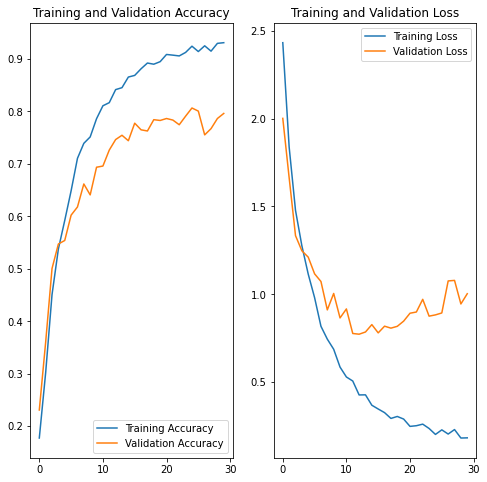

In [42]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Observations**:

The training accuracy seems to be nearly **~90%**.

The validation accuracy is nearly ~80%.

Though the model accuracy has improved, the class rebalance has helped treat the overfitting to some extent.

Much better models could be built or tried out using more epochs and more layers.